# 1. Install Dependencies and Setup

In [33]:
import tensorflow as tf
import os

In [34]:
os.listdir("data")

['গণিত, বিজ্ঞান ও প্রযুক্তি', 'ইতিহাস ও রাজনীতি', 'গল্প', 'কমিক্স ও ছবির গল্প']

In [35]:
directory_path = "data"
file_list = os.listdir(directory_path)
ds_store_path = os.path.join(directory_path, '.DS_Store')
if os.path.exists(ds_store_path):
    os.remove(ds_store_path)

In [36]:
all_catagories = os.listdir("data")
all_catagories

['গণিত, বিজ্ঞান ও প্রযুক্তি', 'ইতিহাস ও রাজনীতি', 'গল্প', 'কমিক্স ও ছবির গল্প']

# 2. Remove dodgy images

In [37]:
import cv2
import imghdr

In [38]:
data_dir = 'data' 

In [39]:
image_exts = ['jpeg','jpg', 'png']

In [40]:
from matplotlib import pyplot as plt

In [41]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            os.remove(image_path)

# 3. Load Data

In [42]:
import numpy as np
from matplotlib import pyplot as plt

In [43]:
#tf.data.Dataset??
#tf.keras.utils.image_dataset_from_directory??

In [44]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 881 files belonging to 4 classes.


In [45]:
for batch in data:
    images, labels = batch  # Each batch contains images and labels
    print("Batch shape:", images.shape)
    print("Labels:", labels)
    
    # You can add more information or inspection here as needed
    
    break 

Batch shape: (32, 256, 256, 3)
Labels: tf.Tensor([3 2 2 1 3 0 0 2 1 1 1 0 1 2 1 2 1 1 0 0 2 1 3 0 1 2 0 3 0 0 0 2], shape=(32,), dtype=int32)


In [46]:
data_iterator = data.as_numpy_iterator()

In [47]:
batch = data_iterator.next()

In [48]:
batch[0].shape

(32, 256, 256, 3)

In [49]:
#Class 1 = Comis, Class 2 = Math/science,class 3 = golpo, class 0 = politics/ history
batch[1]

array([3, 2, 0, 0, 0, 2, 2, 2, 3, 2, 2, 2, 0, 1, 3, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 3, 3, 2, 1, 1, 2, 2, 2], dtype=int32)

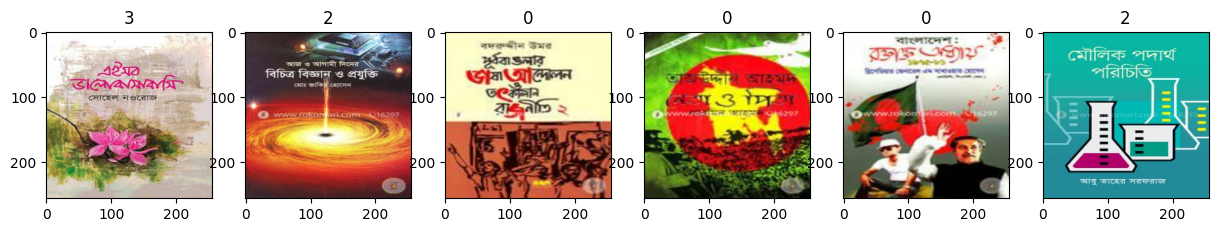

In [50]:
fig, ax = plt.subplots(ncols=6, figsize=(15,15))
for idx, img in enumerate(batch[0][:6]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [51]:
batch[0].max()

255.0

In [52]:
data = data.map(lambda x,y: (x/255, y))

In [53]:
scaled = data.as_numpy_iterator()

In [54]:
batch = scaled.next()

In [55]:
batch[0].max()

1.0

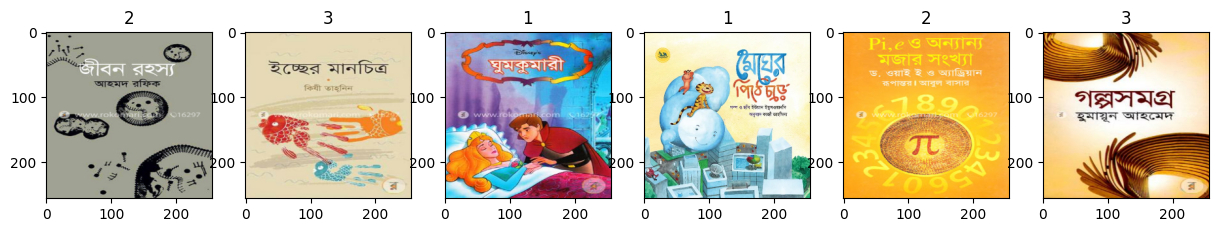

In [56]:
fig, ax = plt.subplots(ncols=6, figsize=(15,15))
for idx, img in enumerate(batch[0][:6]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

# 5. Split Data

In [57]:
len(data)

28

In [58]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [59]:
val_size

6

In [60]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [61]:
test_iterator = test.as_numpy_iterator()
for batch in test_iterator:
    images, labels = batch
    print("Batch shape (NumPy):", images.shape)
    print("Labels (NumPy):", labels)
    break 

Batch shape (NumPy): (32, 256, 256, 3)
Labels (NumPy): [1 2 1 0 0 2 0 2 3 2 1 2 3 0 1 2 2 2 1 3 0 1 0 3 0 1 3 1 1 2 2 2]


In [62]:
# num_classes = 4

# # Map the data to include one-hot encoded labels using tf.one_hot
# train = train.map(lambda x, y: (x, tf.one_hot(y, num_classes)))
# val = val.map(lambda x, y: (x, tf.one_hot(y, num_classes)))
# test = test.map(lambda x, y: (x, tf.one_hot(y, num_classes)))


# 6. Build Deep Learning Model

In [63]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, AveragePooling2D,Dropout

In [64]:
model = Sequential()

In [65]:
# model.add(Conv2D(64, (3,3),1, activation='relu', input_shape=(256,256,3)))
# model.add(MaxPooling2D())
# model.add(Dropout(0.15))
# model.add(Conv2D(32, (3,3),1, activation='relu'))
# model.add(MaxPooling2D())
# model.add(Dropout(0.15))
# model.add(Conv2D(16, (3,3),1, activation='relu'))
# model.add(MaxPooling2D())
# model.add(Dropout(0.15))
# model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.20))
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.15))
# model.add(Dense(4, activation='softmax'))

model.add(Conv2D(16, (3,3),1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3),1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3),1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.20))
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [66]:
#model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=['accuracy'])



In [67]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

# 7. Train

In [68]:
logdir='logs'

In [69]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [70]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


19/19 [==============================] - 10s 488ms/step - loss: 1.4428 - accuracy: 0.3010 - val_loss: 1.3235 - val_accuracy: 0.3542
Epoch 2/20
19/19 [==============================] - 9s 429ms/step - loss: 1.2673 - accuracy: 0.4276 - val_loss: 1.2066 - val_accuracy: 0.5000
Epoch 3/20
19/19 [==============================] - 10s 473ms/step - loss: 1.0537 - accuracy: 0.5938 - val_loss: 1.0247 - val_accuracy: 0.5833
Epoch 4/20
19/19 [==============================] - 9s 437ms/step - loss: 0.8136 - accuracy: 0.6661 - val_loss: 0.8256 - val_accuracy: 0.6667
Epoch 5/20
19/19 [==============================] - 9s 431ms/step - loss: 0.5978 - accuracy: 0.7780 - val_loss: 0.6503 - val_accuracy: 0.7708
Epoch 6/20
19/19 [==============================] - 9s 436ms/step - loss: 0.4513 - accuracy: 0.8421 - val_loss: 0.6934 - val_accuracy: 0.7500
Epoch 7/20
19/19 [==============================] - 9s 443ms/step - loss: 0.3151 - accuracy: 0.8865 - val_loss: 0.5071 - val_accuracy: 0.8229
Epoch 8/20
19/1

# 8. Plot Performance

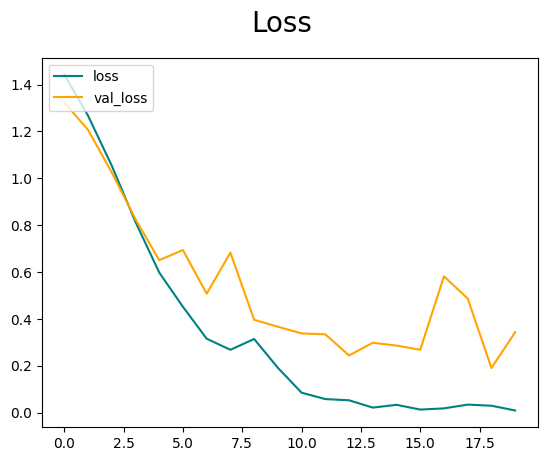

In [71]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

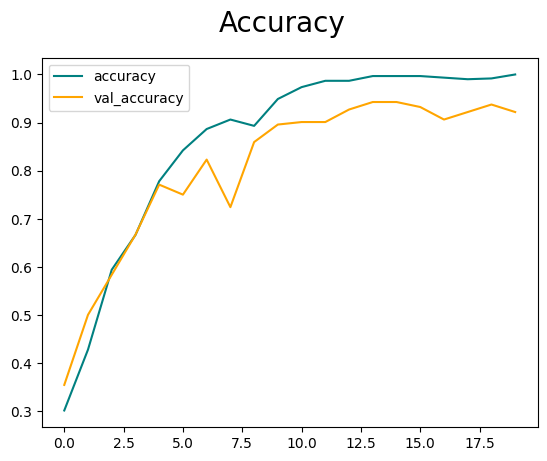

In [72]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [101]:
from keras.metrics import Precision, Recall, CategoricalAccuracy

In [102]:
overall_precision = Precision()
overall_recall = Recall()
overall_accuracy = CategoricalAccuracy()

In [103]:
for batch in test.as_numpy_iterator():
    x_batch, y_batch = batch  
    y_pred = model.predict(x_batch)

    y_true_category = y_batch
    y_pred_category = np.argmax(y_pred, axis=-1)

    overall_precision.update_state(y_true_category, y_pred_category)
    overall_recall.update_state(y_true_category, y_pred_category)
    overall_accuracy.update_state(y_true_category, y_pred_category)

# Get the final results for overall metrics
overall_precision_result = overall_precision.result().numpy()
overall_recall_result = overall_recall.result().numpy()
overall_accuracy_result = overall_accuracy.result().numpy()

# Print or use the results as needed
print("Overall Precision:", overall_precision_result)
print("Overall Recall:", overall_recall_result)
print("Overall Categorical Accuracy:", overall_accuracy_result)


1/1 [==============================] - 0s 56ms/step
Overall Precision: 0.9705882
Overall Recall: 0.98507464
Overall Categorical Accuracy: 1.0


# 10. Test

In [113]:
# Assuming you have a test dataset named 'test'
test_results = model.evaluate(test)

# Display the test results
print("Test Loss:", test_results[0])
print("Test Accuracy:", test_results[1])


3/3 [==============================] - 2s 57ms/step - loss: 0.5053 - accuracy: 0.9259
Test Loss: 0.5053114891052246
Test Accuracy: 0.9259259104728699


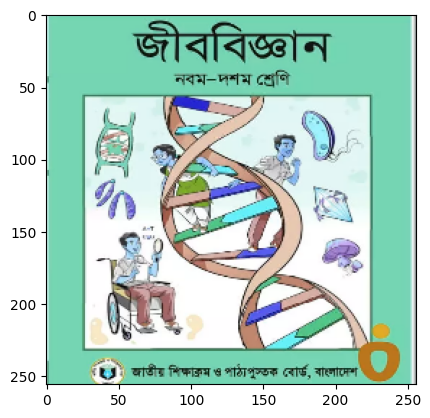

In [105]:
img = cv2.imread('7try.jpeg')

# Resize the image
resized_img = tf.image.resize(img, (256, 256)).numpy().astype(int)

# Display the resized image
plt.imshow(resized_img)
plt.show()

In [106]:
img_for_prediction = np.expand_dims(resized_img/255, 0)

# Make predictions
predictions = model.predict(img_for_prediction)

print(predictions)


1/1 [==============================] - 0s 16ms/step
[[1.1613576e-04 8.9588928e-01 1.0100532e-01 2.9893105e-03]]


In [107]:
predicted_class_index = np.argmax(predictions)
print("Predicted Class Index:", predicted_class_index)

#Class 1 = Comis, Class 2 = Math/science,class 3 = golpo, class 0 = politics/ history
new_catagories = ['ইতিহাস ও রাজনীতি','কমিক্স ও ছবির গল্প','গণিত, বিজ্ঞান ও প্রযুক্তি','গল্প']
print(new_catagories[predicted_class_index])


Predicted Class Index: 1
কমিক্স ও ছবির গল্প


# 11. Save the Model

In [114]:
#from keras.models import load_model

In [81]:
#model.save(os.path.join('models','Best4.h5'))

In [121]:
#new_model = load_model(os.path.join('models','Best.h5'))

In [125]:
# test_results = new_model.evaluate(test)

# # Display the test results
# print("Test Loss:", test_results[0])
# print("Test Accuracy:", test_results[1])

3/3 [==============================] - 2s 61ms/step - loss: 0.0625 - accuracy: 0.9753
Test Loss: 0.06245894357562065
Test Accuracy: 0.9753086566925049


In [83]:
# p = new_model.predict(img_for_prediction)
# p

In [84]:
# predicted_class_index = np.argmax(p)
# print("Predicted Class Index:", predicted_class_index)

# #Class 1 = Comis, Class 2 = Math/science,class 3 = golpo, class 0 = politics/ history
# new_catagories = ['ইতিহাস ও রাজনীতি','কমিক্স ও ছবির গল্প','গণিত, বিজ্ঞান ও প্রযুক্তি','গল্প']
# print(new_catagories[predicted_class_index])